In [1]:
from deepmol.loaders import CSVLoader

train = CSVLoader("train.csv",
                        labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
       'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
       'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
       'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
       'C09762'],
                        id_field="ids", smiles_field="smiles").create_dataset()
valid = CSVLoader("valid.csv",
                        labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
       'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
       'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
       'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
       'C09762'],
                        id_field="ids", smiles_field="smiles").create_dataset()
test = CSVLoader("test.csv",
                  labels_fields=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
       'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
       'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
       'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
       'C09762'],
                  id_field="ids", smiles_field="smiles").create_dataset()

2023-08-23 10:34:24,512 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!
2023-08-23 10:34:24,569 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!
2023-08-23 10:34:24,594 — INFO — Assuming multitask since y has more than one dimension. If otherwise, explicitly set the mode to 'classification' or 'regression'!


In [2]:
from deepmol.pipeline import Pipeline

best_pipeline = Pipeline.load("sm_predictor_pipeline_motpe/trial_311")

2023-08-23 10:34:39.808956: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-23 10:34:40.575663: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.
[10:34:43] Initializing Normalizer


In [5]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, balanced_accuracy_score
from deepmol.metrics import Metric


def f1_score_macro(y_true, y_pred):
    return f1_score(y_true, y_pred, average='macro')

def precision_macro(y_true, y_pred):
    return precision_score(y_true, y_pred, average='macro')

def recall_macro(y_true, y_pred):
    return recall_score(y_true, y_pred, average='macro')


f1_score_macro_metric = Metric(f1_score_macro)
precision_score_macro_metric = Metric(precision_macro)
recall_score_macro_metric = Metric(recall_macro)
accuracy_score_metric = Metric(balanced_accuracy_score)

_, test_per_task_metric = best_pipeline.evaluate(test, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric, accuracy_score_metric], per_task_metrics=True)

[10:48:27] Running Normalizer
[10:48:27] Running Normalizer
[10:48:27] Running Normalizer
[10:48:27] Running Normalizer
[10:48:27] Running Uncharger
[10:48:27] Running Normalizer
[10:48:27] Running Uncharger
[10:48:27] Running Uncharger
[10:48:27] Running Normalizer
[10:48:27] Running Uncharger
[10:48:27] Running Uncharger
[10:48:27] Running Normalizer
[10:48:27] Running Normalizer
[10:48:27] Running Normalizer
[10:48:27] Running Uncharger
[10:48:27] Running Uncharger
[10:48:27] Running Normalizer
[10:48:27] Running Normalizer
[10:48:27] Running Uncharger
[10:48:27] Running Uncharger
[10:48:27] Running Normalizer
[10:48:27] Running Uncharger
[10:48:27] Running Uncharger
[10:48:27] Running Uncharger
[10:48:27] Running Uncharger
[10:48:27] Running Normalizer
[10:48:27] Running Uncharger
[10:48:27] Running Normalizer
[10:48:27] Running Uncharger
[10:48:27] Running Uncharger
[10:48:27] Running Normalizer
[10:48:27] Running Uncharger
[10:48:27] Running Uncharger
[10:48:27] Running Uncharger

In [6]:
_, valid_per_task_metric = best_pipeline.evaluate(valid, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric, accuracy_score_metric], per_task_metrics=True)

[10:48:33] Running Normalizer
[10:48:33] Running Normalizer
[10:48:33] Running Normalizer
[10:48:33] Running Normalizer
[10:48:33] Running Normalizer
[10:48:33] Running Uncharger
[10:48:33] Running Normalizer
[10:48:33] Running Uncharger
[10:48:33] Running Uncharger
[10:48:33] Running Uncharger
[10:48:33] Running Uncharger
[10:48:33] Running Normalizer
[10:48:33] Running Normalizer
[10:48:33] Running Uncharger
[10:48:33] Running Normalizer
[10:48:33] Running Uncharger
[10:48:33] Running Normalizer
[10:48:33] Running Uncharger
[10:48:33] Running Normalizer
[10:48:33] Running Normalizer
[10:48:33] Running Uncharger
[10:48:33] Running Uncharger
[10:48:33] Running Uncharger
[10:48:33] Running Uncharger
[10:48:33] Running Uncharger
[10:48:33] Running Normalizer
[10:48:33] Running Normalizer
[10:48:33] Running Uncharger
[10:48:33] Running Uncharger
[10:48:33] Running Normalizer
[10:48:33] Running Uncharger
[10:48:33] Running Uncharger
[10:48:33] Running Uncharger
[10:48:33] Running Uncharger

In [8]:
_, train_per_task_metric = best_pipeline.evaluate(train, [f1_score_macro_metric, precision_score_macro_metric, recall_score_macro_metric, accuracy_score_metric], per_task_metrics=True)

[10:48:49] Running Normalizer
[10:48:49] Running Normalizer
[10:48:49] Running Normalizer
[10:48:49] Running Normalizer
[10:48:49] Running Normalizer
[10:48:49] Running Normalizer
[10:48:49] Running Normalizer
[10:48:49] Running Normalizer
[10:48:49] Running Normalizer
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Normalizer
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Normalizer
[10:48:49] Running Normalizer
[10:48:49] Running Normalizer
[10:48:49] Running Normalizer
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Normalizer
[10:48:49] Running Uncharger
[10:48:49] Running Normalizer
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Uncharger
[10:48:49] Running Uncharge

In [18]:
import pandas as pd

labels = {
    'C00341': 'Geranyl diphosphate',
    'C01789': 'Campesterol',
    'C00078': 'Tryptophan',
    'C00049': 'L-Aspartate',
    'C00183': 'L-Valine',
    'C03506': 'Indoleglycerol phosphate',
    'C00187': 'Cholesterol',
    'C00079': 'L-Phenylalanine',
    'C00047': 'L-Lysine',
    'C01852': 'Secologanin',
    'C00407': 'L-Isoleucine',
    'C00129': 'Isopentenyl diphosphate',
    'C00235': 'Dimethylallyl diphosphate',
    'C00062': 'L-Arginine',
    'C00353': 'Geranylgeranyl diphosphate',
    'C00148': 'L-Proline',
    'C00073': 'L-Methionine',
    'C00108': 'Anthranilate',
    'C00123': 'L-Leucine',
    'C00135': 'L-Histidine',
    'C00448': 'Farnesyl diphosphate',
    'C00082': 'L-Tyrosine',
    'C00041': 'L-Alanine',
    'C00540': 'Cinnamoyl-CoA',
    'C01477': 'Apigenin',
    'C05903': 'Kaempferol',
    'C05904': 'Pelargonin',
    'C05905': 'Cyanidin',
    'C05908': 'Delphinidin',
    'C00389': 'Quercetin',
    'C01514': 'Luteolin',
    'C09762': "Liquiritigenin",
    'C00509': 'Naringenin',
    'C00223': 'p-Coumaroyl-CoA'
}

# replace the labels in the columns with the names

results_per_metric = pd.DataFrame()

for metric in test_per_task_metric:
    for i in range(len(test_per_task_metric[metric])):
        results_per_metric = pd.concat((pd.DataFrame({'metric': [metric], 'dataset': "test", 'task': labels[test.label_names[i]], 'value': test_per_task_metric[metric][i]}), results_per_metric), ignore_index=True)

    for i in range(len(train_per_task_metric[metric])):
        results_per_metric = pd.concat((pd.DataFrame({'metric': [metric], 'dataset': "train", 'task': labels[train.label_names[i]], 'value': train_per_task_metric[metric][i]}), results_per_metric), ignore_index=True)

    for i in range(len(valid_per_task_metric[metric])):
        results_per_metric = pd.concat((pd.DataFrame({'metric': [metric], 'dataset': "valid", 'task': labels[valid.label_names[i]], 'value': valid_per_task_metric[metric][i]}), results_per_metric), ignore_index=True)


In [15]:
results_per_metric

,metric,dataset,task,value
0,balanced_accuracy_score,test,Liquiritigenin,0.896667
1,balanced_accuracy_score,test,Delphinidin,1.000000
2,balanced_accuracy_score,test,Cyanidin,0.909091
3,balanced_accuracy_score,test,Pelargonin,1.000000
4,balanced_accuracy_score,test,Kaempferol,1.000000
...,...,...,...,...
343,f1_score_macro,test,Dimethylallyl diphosphate,1.000000
344,f1_score_macro,test,L-Tyrosine,0.985561
345,f1_score_macro,test,L-Phenylalanine,0.952263
346,f1_score_macro,test,Tryptophan,0.985561


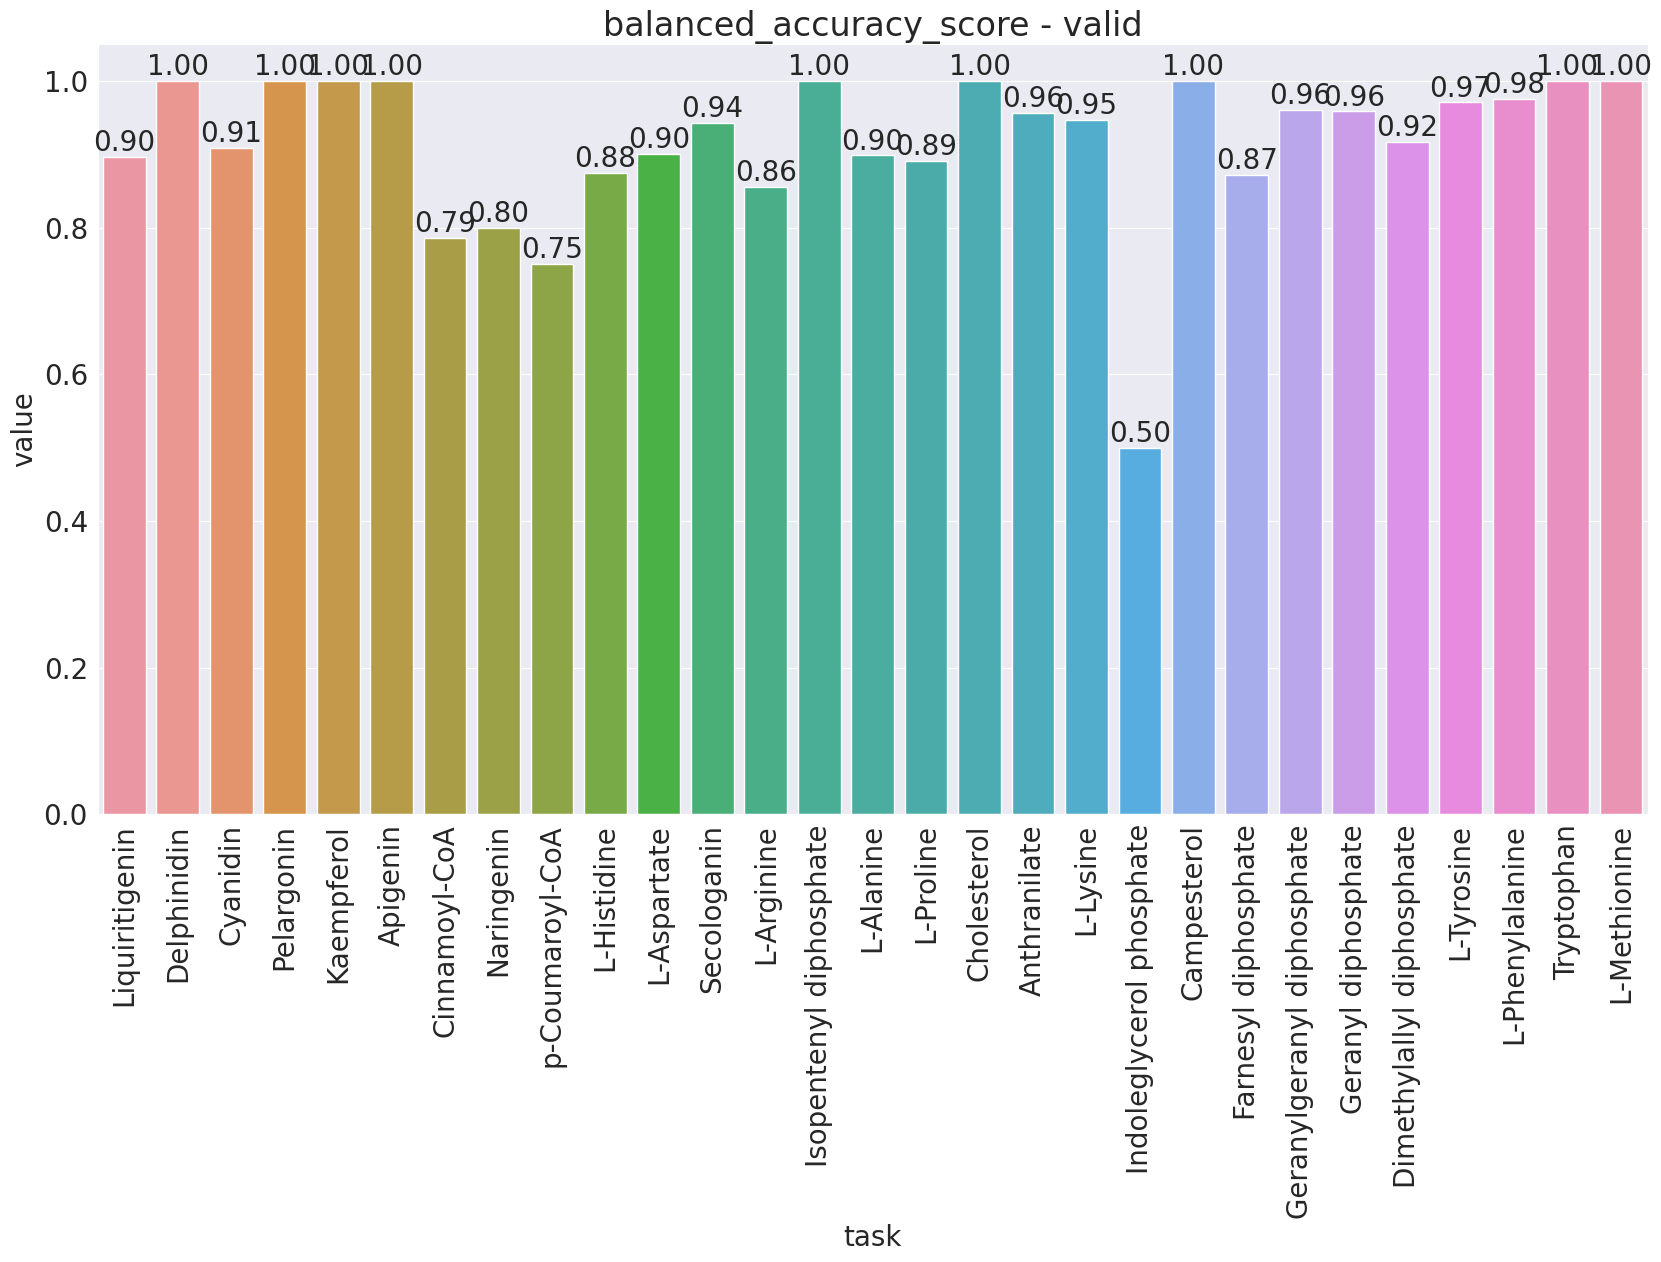

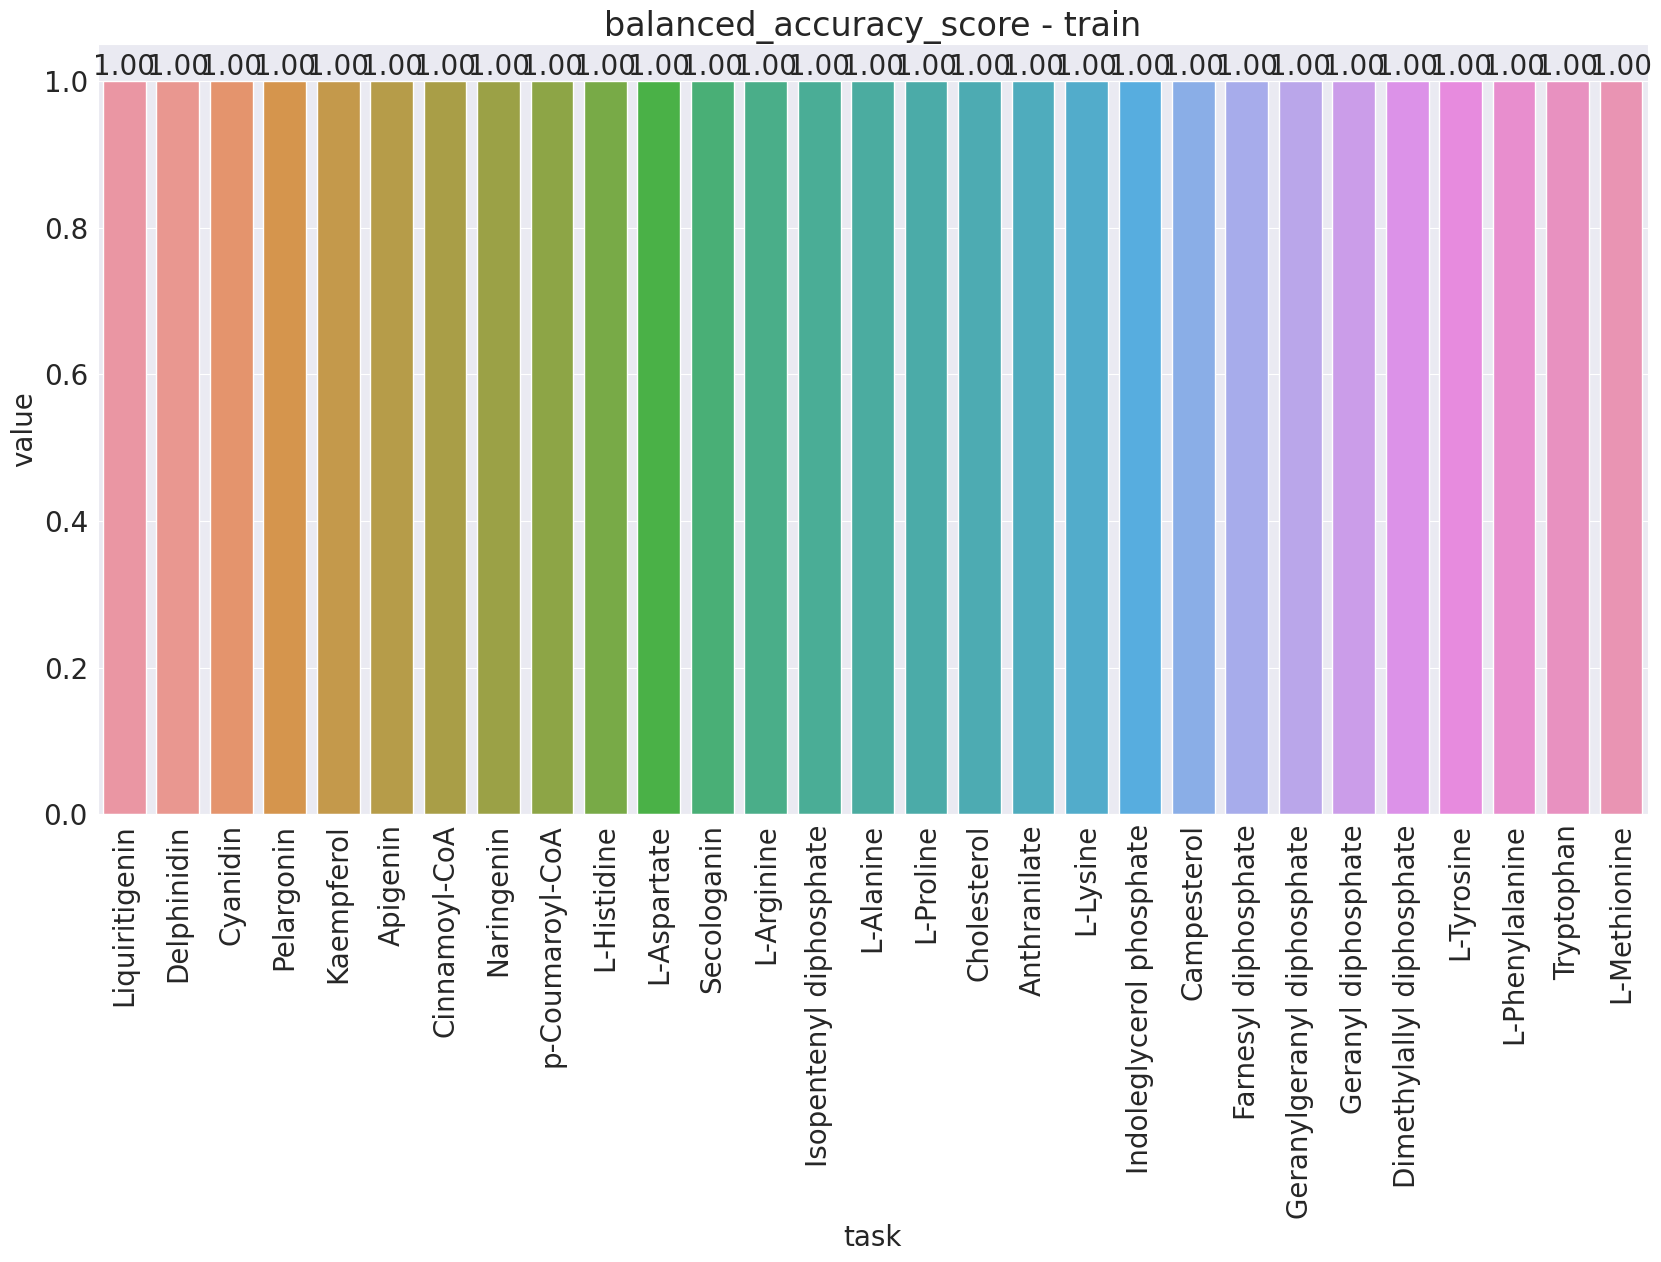

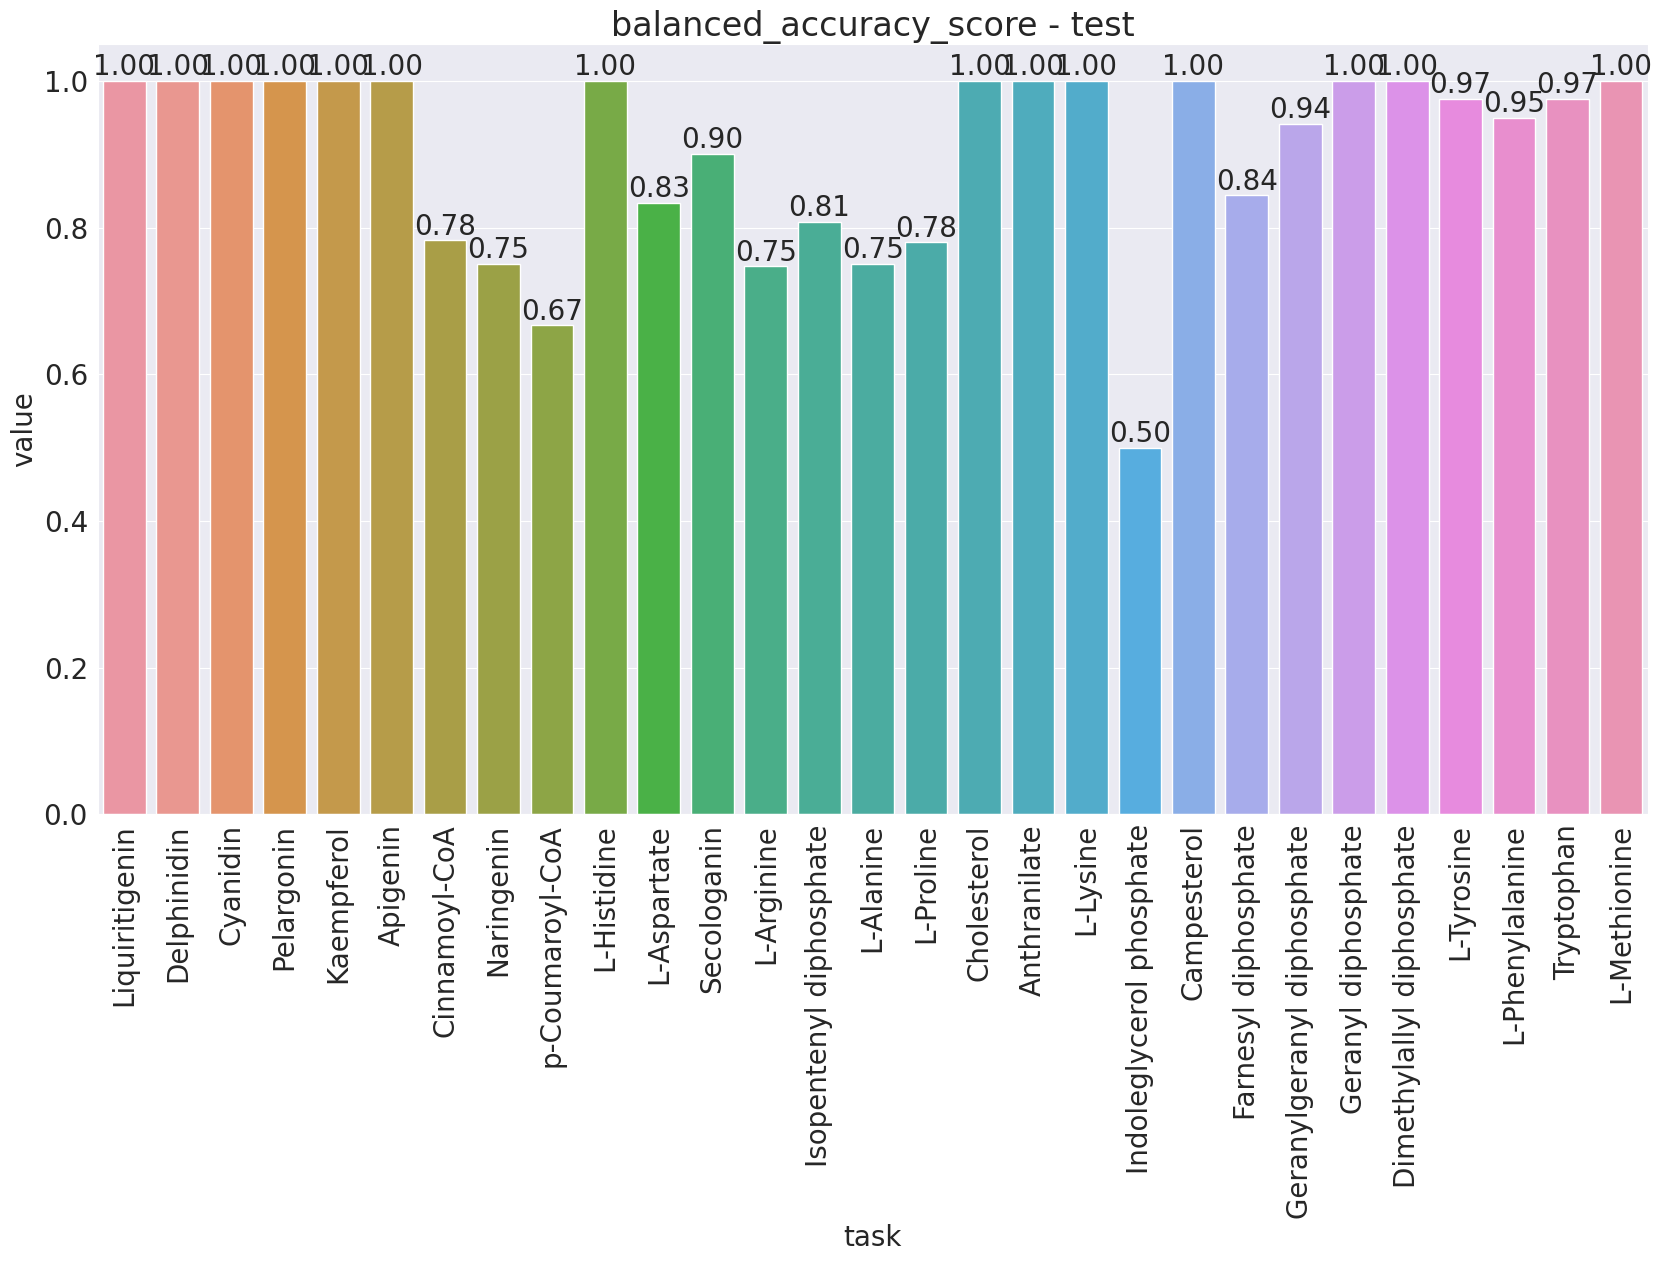

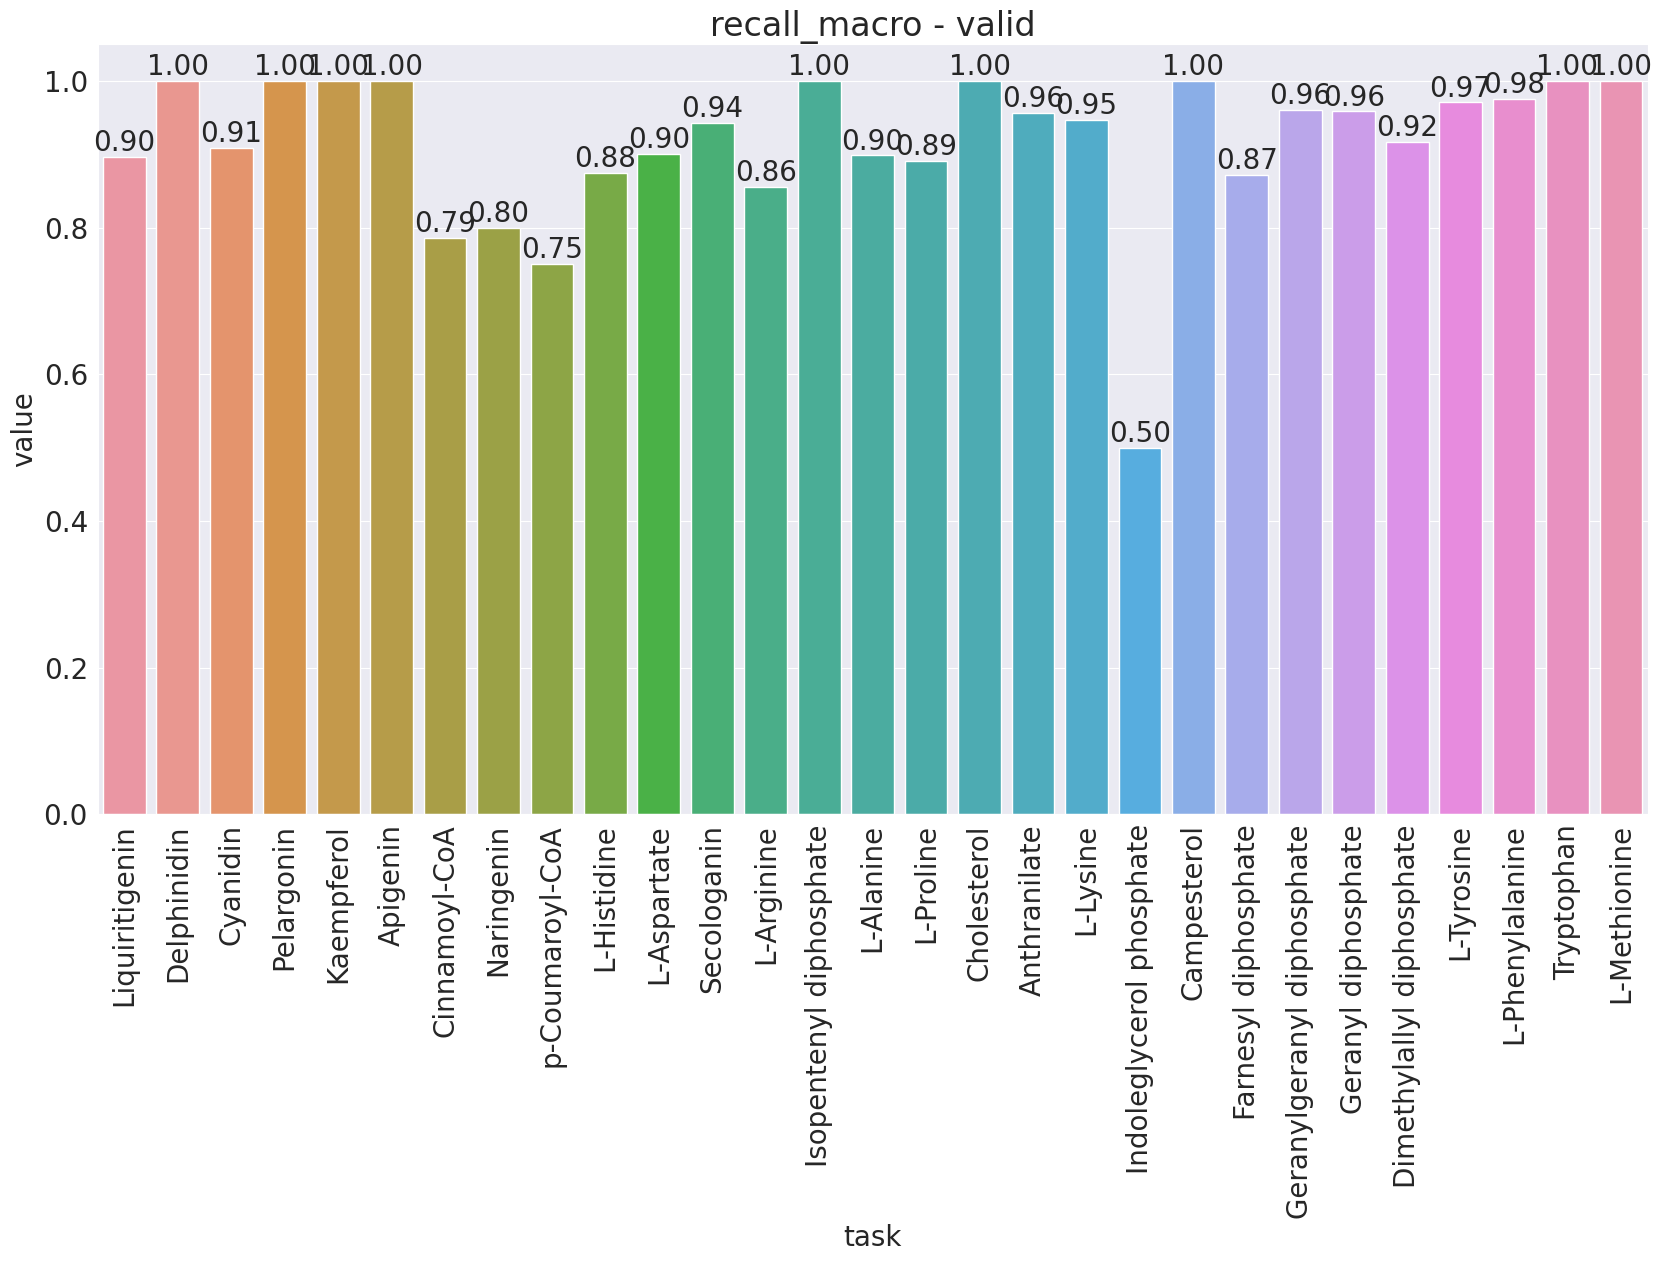

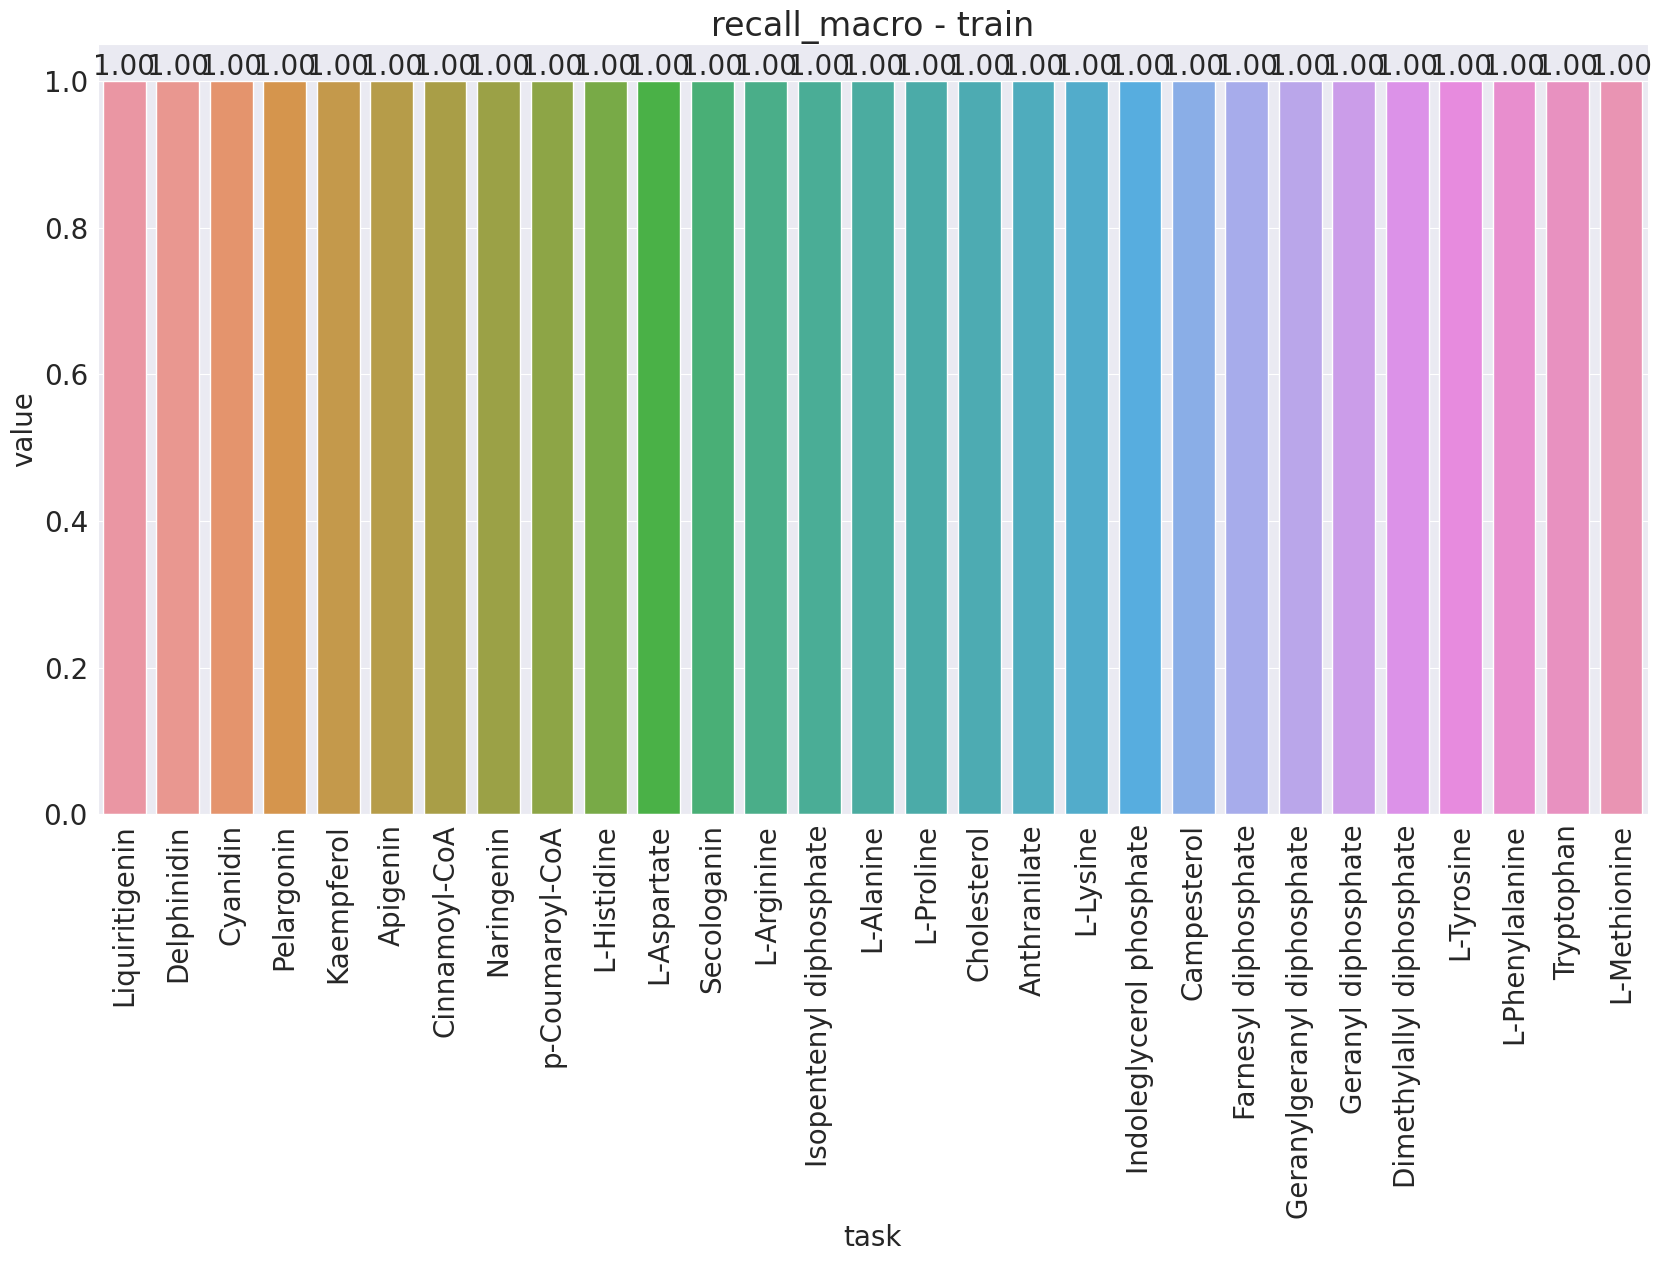

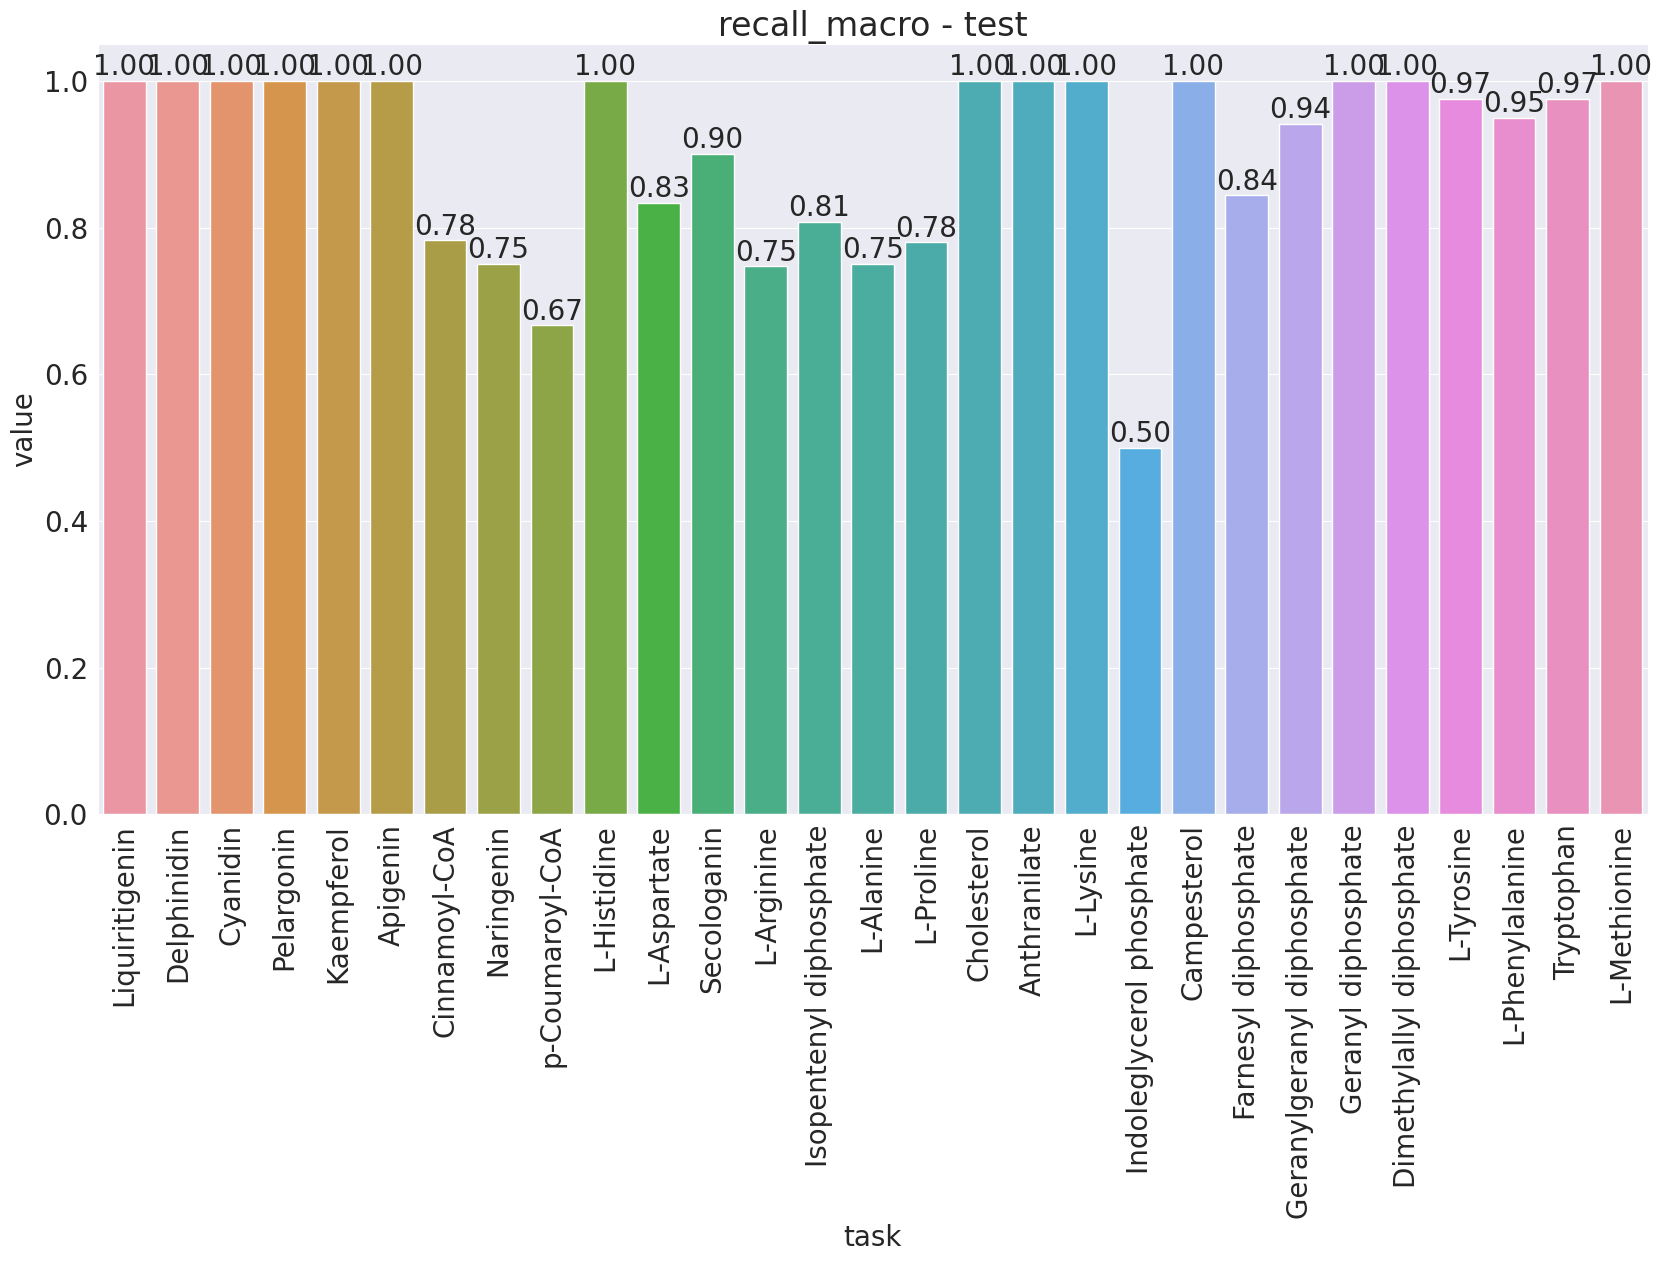

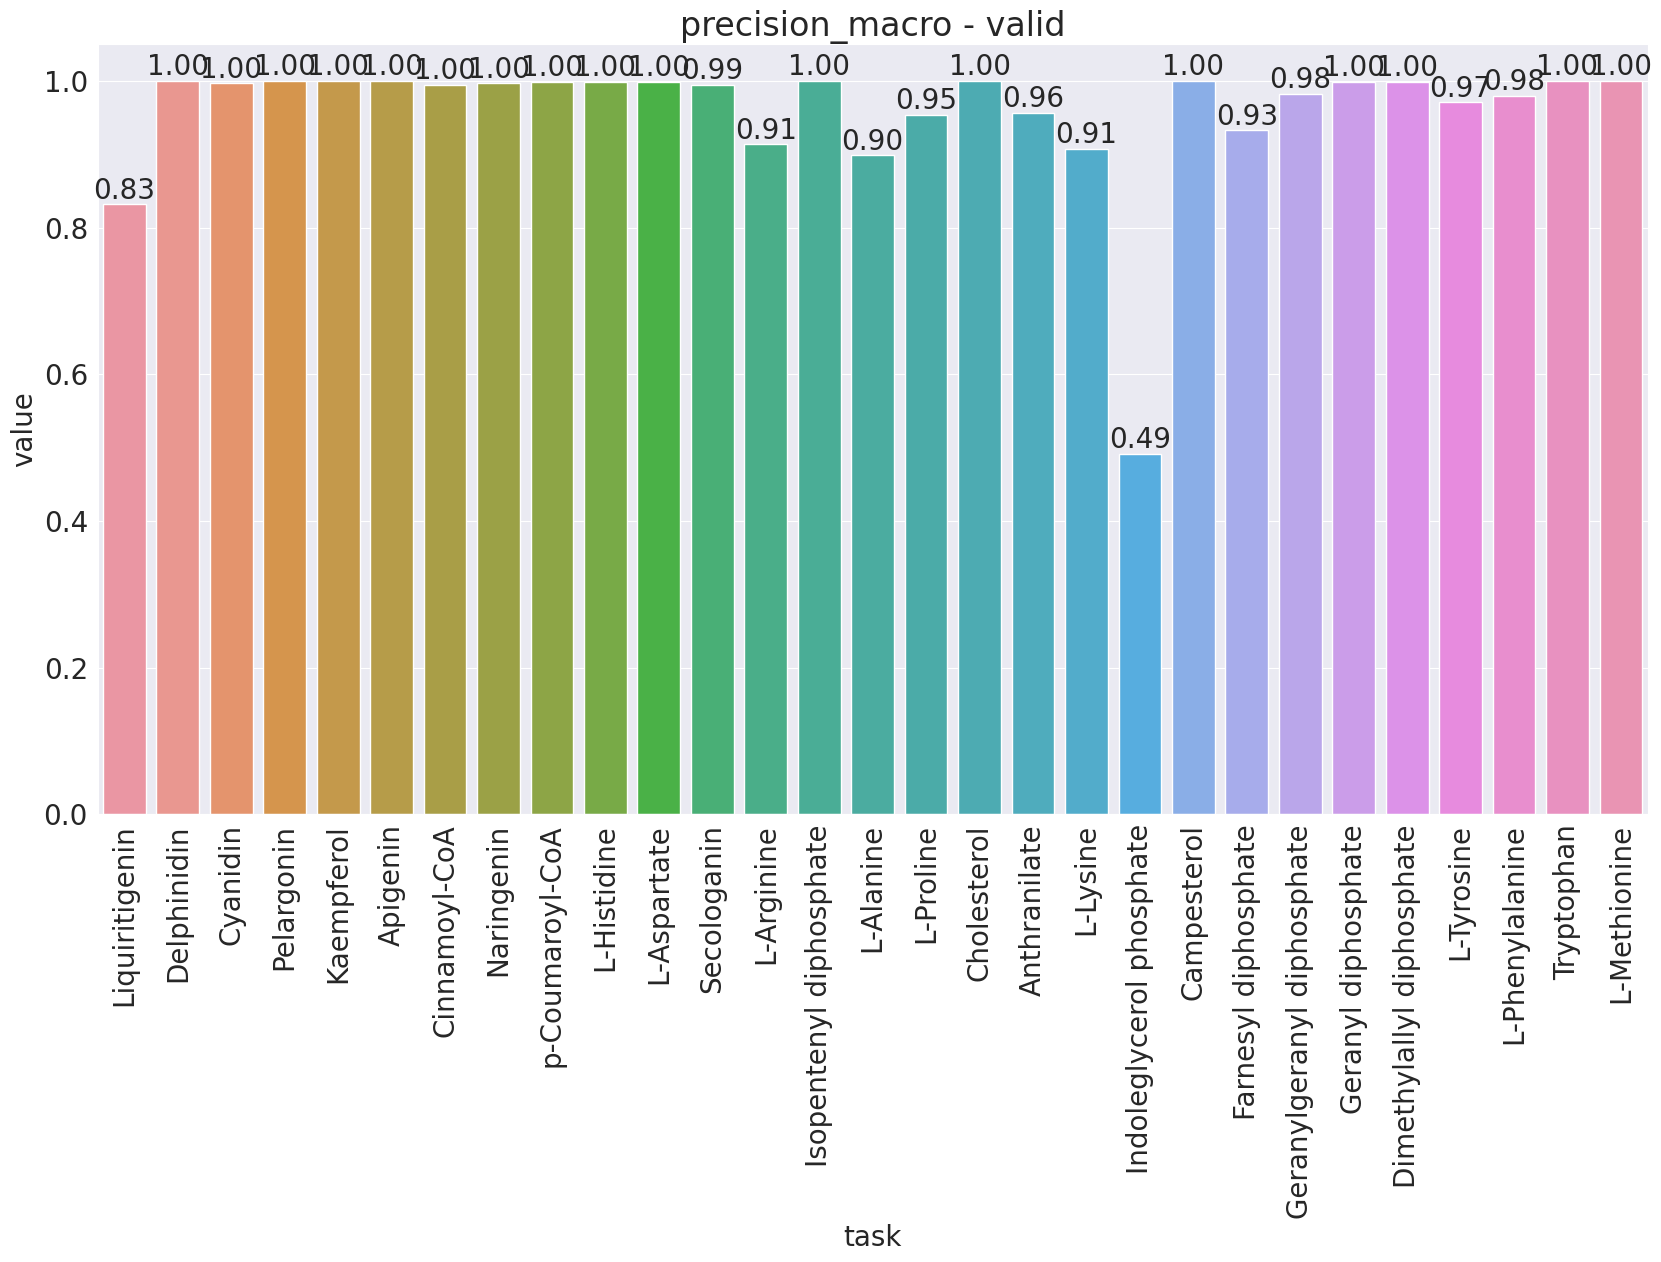

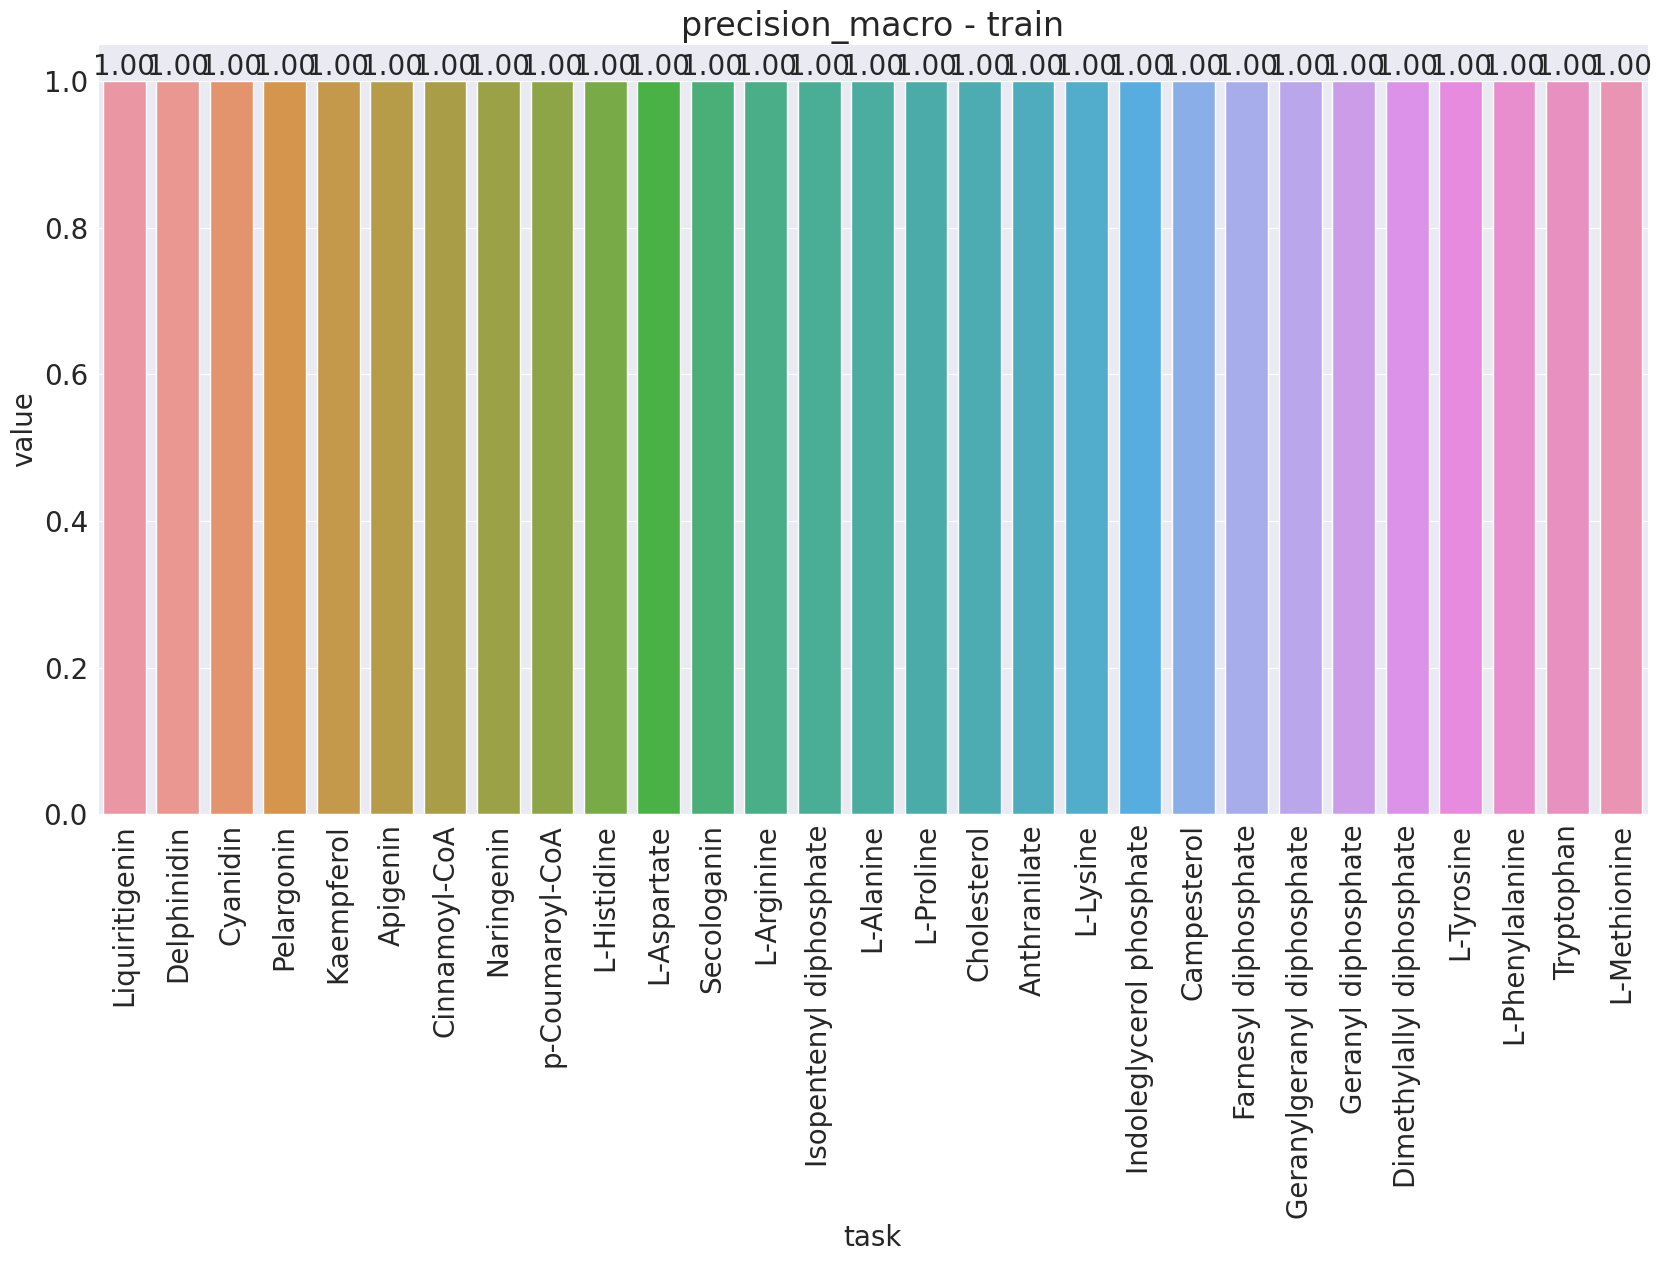

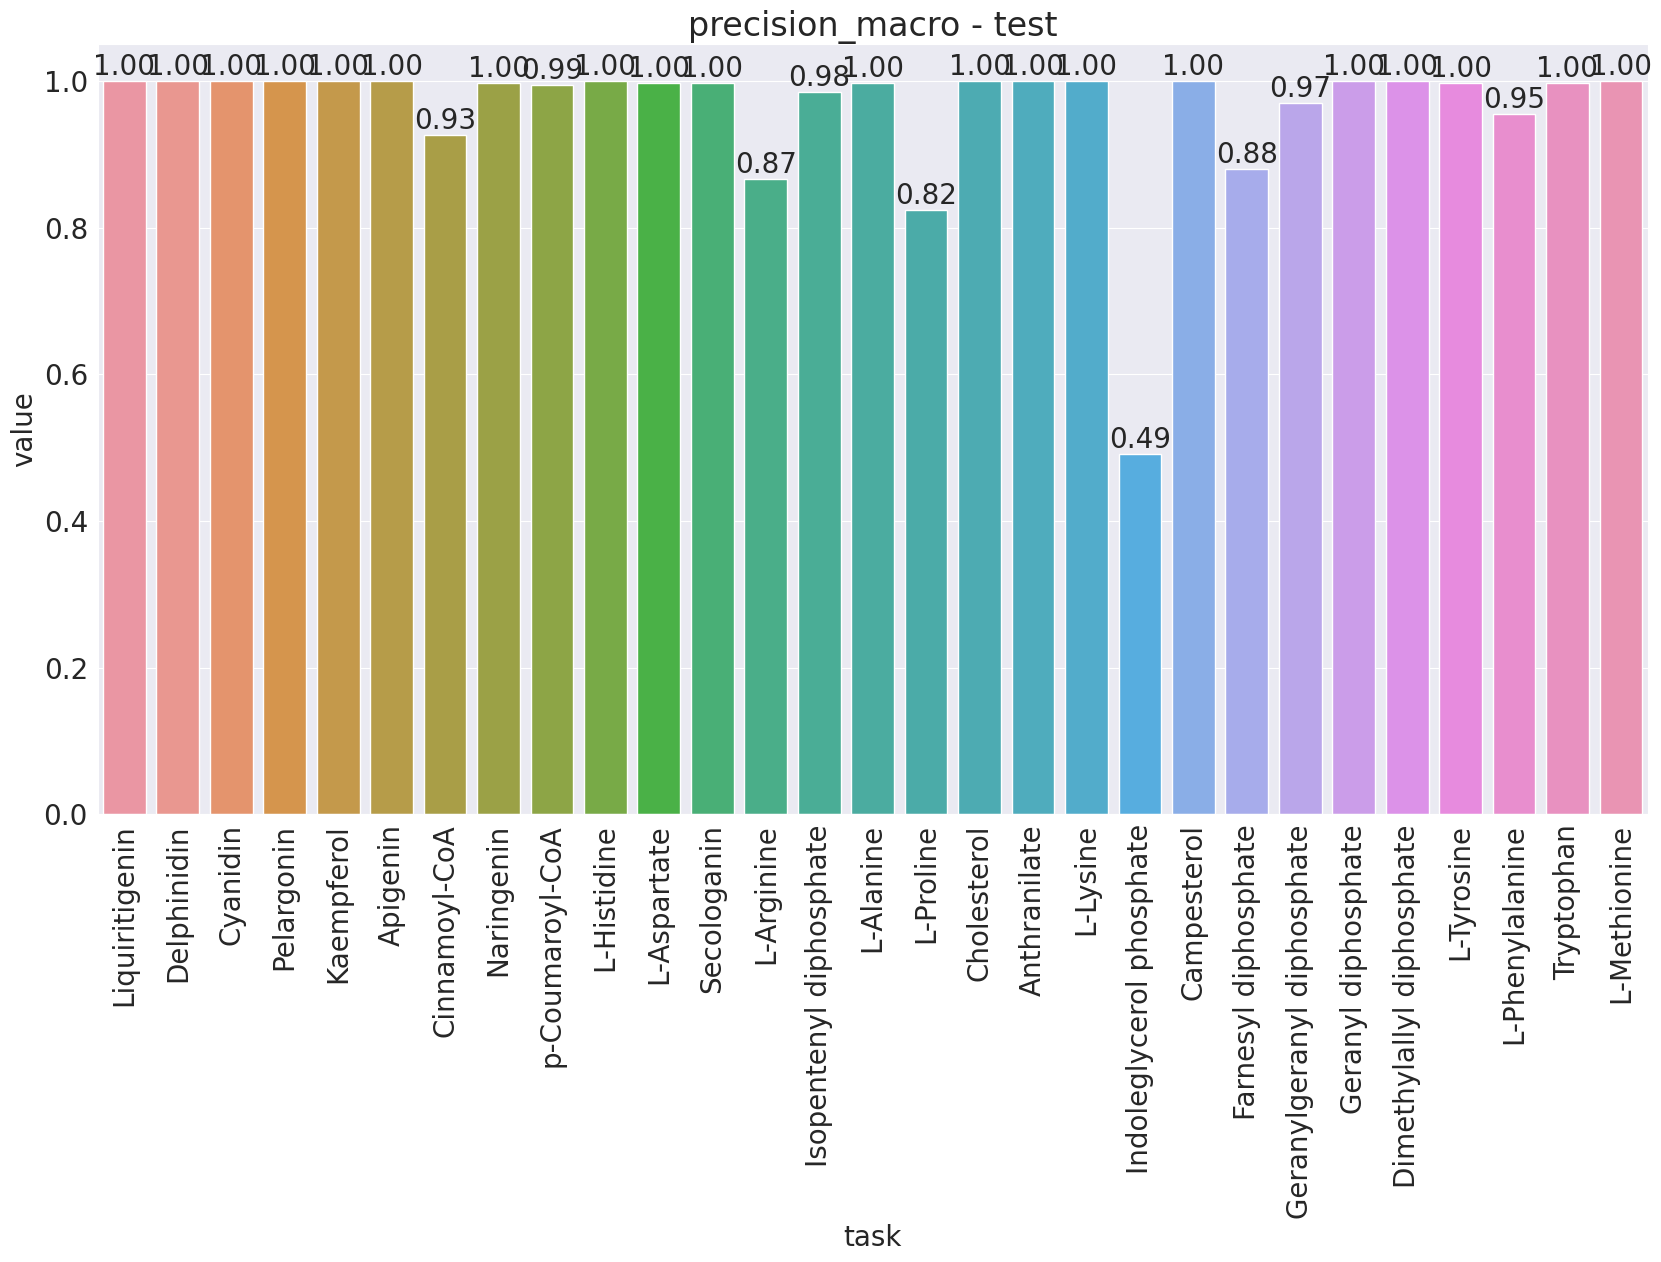

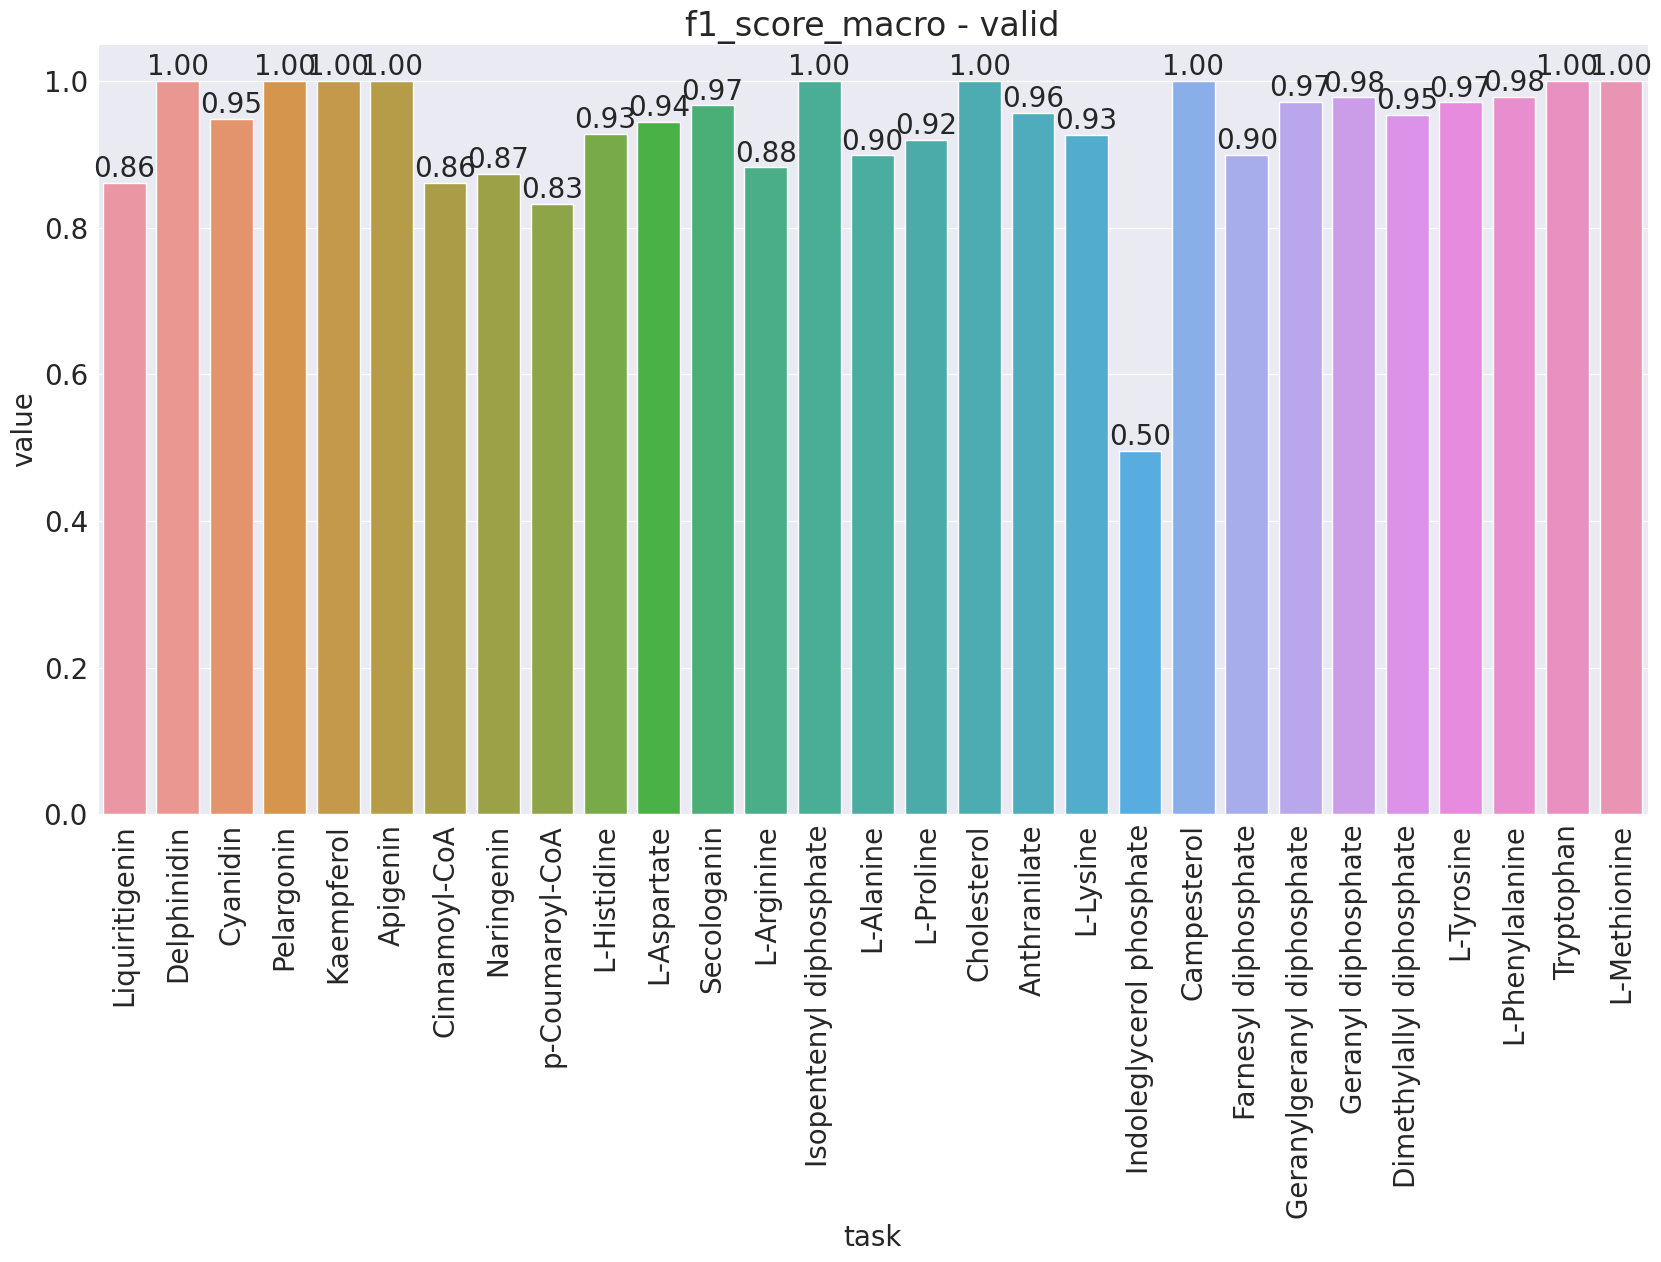

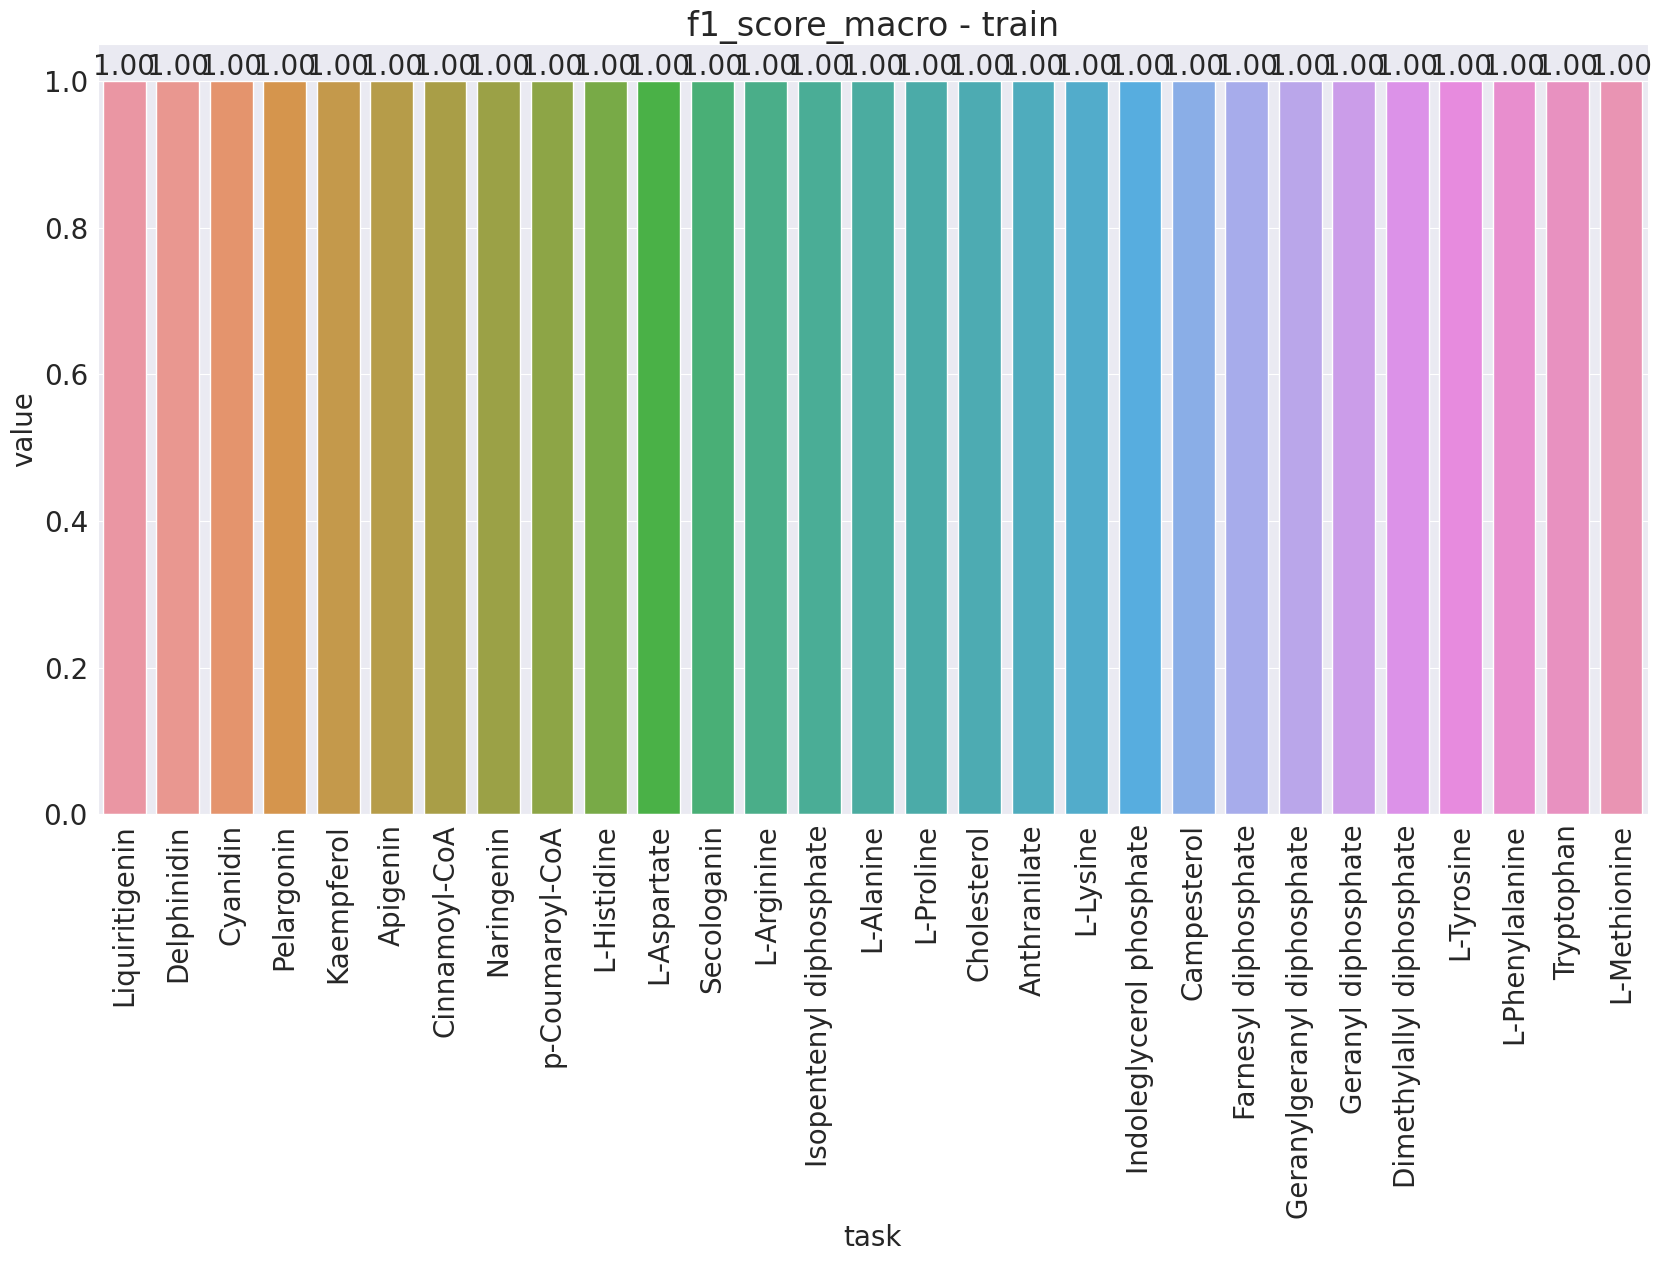

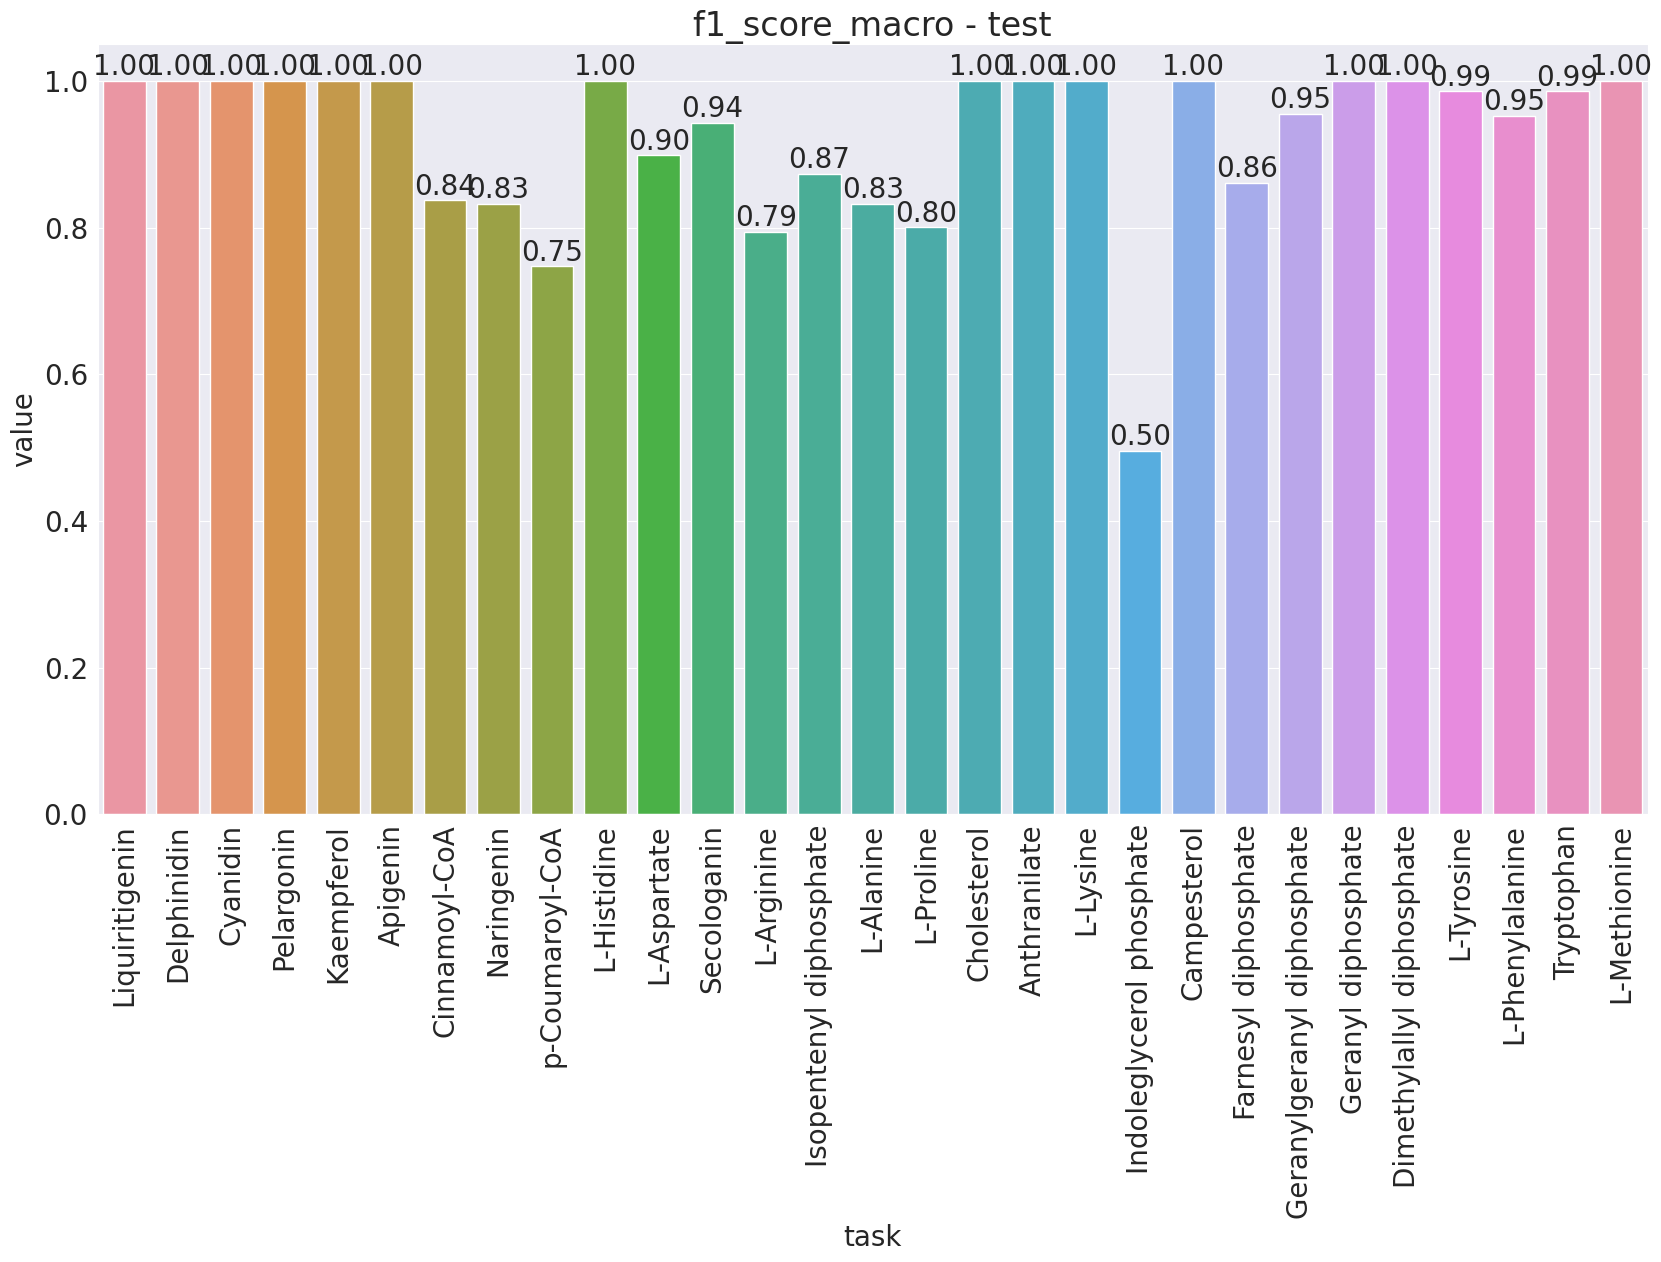

In [19]:
# make a bar plot for each metric and dataset with the values on top of the bars
import matplotlib.pyplot as plt
import seaborn as sns

for metric in results_per_metric.metric.unique():
    for dataset in results_per_metric.dataset.unique():
        plt.rc('font', size=20)
        plt.figure(figsize=(20, 10))
        ax = sns.barplot(x="task", y="value", data=results_per_metric[(results_per_metric.metric == metric) & (results_per_metric.dataset == dataset)])
        plt.xticks(rotation=90)
        plt.title(f"{metric} - {dataset}")
        # increase the text size in general

        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

        plt.show()

In [1]:
import numpy as np
from deepmol.datasets import SmilesDataset


labels_ = {
    'C00341': 'Geranyl diphosphate',
    'C01789': 'Campesterol',
    'C00078': 'Tryptophan',
    'C00049': 'L-Aspartate',
    'C00183': 'L-Valine',
    'C03506': 'Indoleglycerol phosphate',
    'C00187': 'Cholesterol',
    'C00079': 'L-Phenylalanine',
    'C00047': 'L-Lysine',
    'C01852': 'Secologanin',
    'C00407': 'L-Isoleucine',
    'C00129': 'Isopentenyl diphosphate',
    'C00235': 'Dimethylallyl diphosphate',
    'C00062': 'L-Arginine',
    'C00353': 'Geranylgeranyl diphosphate',
    'C00148': 'L-Proline',
    'C00073': 'L-Methionine',
    'C00108': 'Anthranilate',
    'C00123': 'L-Leucine',
    'C00135': 'L-Histidine',
    'C00448': 'Farnesyl diphosphate',
    'C00082': 'L-Tyrosine',
    'C00041': 'L-Alanine',
    'C00540': 'Cinnamoyl-CoA',
    'C01477': 'Apigenin',
    'C05903': 'Kaempferol',
    'C05904': 'Pelargonin',
    'C05905': 'Cyanidin',
    'C05908': 'Delphinidin',
    'C00389': 'Quercetin',
    'C01514': 'Luteolin',
    'C09762': "Liquiritigenin",
    'C00509': 'Naringenin',
    'C00223': 'p-Coumaroyl-CoA'
}

labels=['C00073', 'C00078', 'C00079', 'C00082', 'C00235', 'C00341', 'C00353',
       'C00448', 'C01789', 'C03506', 'C00047', 'C00108', 'C00187', 'C00148',
       'C00041', 'C00129', 'C00062', 'C01852', 'C00049', 'C00135', 'C00223',
       'C00509', 'C00540', 'C01477', 'C05903', 'C05904', 'C05905', 'C05908',
       'C09762']


independent_dataset = SmilesDataset(smiles=["C1[C@H]([C@H](OC2=C1C(=CC(=C2[C@@H]3[C@H]([C@H](OC4=C(C(=CC(=C34)O)O)[C@@H]5[C@H]([C@H](OC6=CC(=CC(=C56)O)O)C7=CC(=C(C=C7)O)O)O)C8=CC(=C(C=C8)O)O)O)O)O)C9=CC(=C(C=C9)O)O)O",
                                            "C1C(C(OC2=C1C(=CC(=C2C3C(C(OC4=C(C(=CC(=C34)O)O)C5C(C(OC6=CC(=CC(=C56)O)O)C7=CC(=C(C=C7)O)O)O)C8=CC(=C(C=C8)O)O)O)O)O)C9=CC(=C(C=C9)O)O)O",
                                            "COC1=CC(=CC(=C1O)O)C2=[O+]C3=CC(=CC(=C3C=C2OC4[C@@H]([C@H]([C@@H]([C@H](O4)COC(=O)/C=C/C5=CC=C(C=C5)O)O)O)O)O)O", "CC(=C)/C=C/CC(C)(C=C)O",
                                            "C[C@H]1CC[C@H](CC2=C1C(=O)C[C@@H]2C)C(=C)C",
                                            "C1[C@H]2[C@@H](C[C@](N2)([C@H]([C@@H]1O)O)O)O"], ids=["Procyanidin C1", "Procyanidin trimer T2", "Petunidin 3-(6''-p-coumaroyl-glucoside)",
                                                                                                                                                                                                                                "Hotrienol", "Rotundone", "Calystegine B1"])




predictions = best_pipeline.predict(independent_dataset)

labels_names = np.array([labels_[label] for label in labels])
ones = predictions == 1
labels_all = []
for i, prediction in enumerate(ones):
    labels_all.append(";".join(labels_names[prediction]))
labels_all

NameError: name 'best_pipeline' is not defined